# 🧾 Time Series Analysis – Gray–Scott Reaction–Diffusion

## **1. Objective**
Analyze a real spatiotemporal dataset (Gray–Scott reaction–diffusion) using autocorrelation, ARIMA, Fourier Transform, and Wavelet Transform.

## **2. Load Packages**
Install and import the required Python packages.

In [1]:
import glob
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import scienceplots
plt.style.use(['science', 'nature', 'std-colors'])

import matplotlib.pylab as pylab
params = {'legend.fontsize': 12,
         'axes.labelsize': 12,
         'xtick.labelsize': 12,
         'ytick.labelsize': 12}
pylab.rcParams.update(params)
plt.rcParams.update({'font.size': 12})

In [3]:
from the_well.utils.download import well_download

## **3. Download Dataset**
Use the tutorial from [The Well GitHub repository](https://github.com/PolymathicAI/the_well/blob/master/docs/tutorials/dataset.ipynb) to load the dataset `gray_scott_reaction_diffusion`.

In [4]:
well_download(base_path='./datasets', dataset="gray_scott_reaction_diffusion", split="test")

** Resuming transfer from byte position 243
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   197  100   197    0     0    250      0 --:--:-- --:--:-- --:--:--   250
** Resuming transfer from byte position 2624092236
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

100   197  100   197    0     0    298      0 --:--:-- --:--:-- --:--:--   299
** Resuming transfer from byte position 2624092236
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   197  100   197    0     0   1219      0 --:--:-- --:--:-- --:--:--  1216
** Resuming transfer from byte position 2624092236
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   197  100   197    0     0   1131      0 --:--:-- --:--:-- --:--:--  1132
** Resuming transfer from byte position 2624092236
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   197  100   197    0     0   1060      0 --:--:-- --:--:-- --:--:--  1064
** Resuming transfer from byte position 2624092236
  % To

## **4. Select a Random Trajectory**
- The dataset has 120 repetitions.
- Select a random number `n` between 0 and 119.
- Extract the trajectory using:

```python
x = dataset[n]["input_fields"]
```
- Confirm that `x` has shape `(2, 1000, 128, 128)`.

In [5]:
set_path = "test"
paths = sorted(glob.glob(f"./datasets/datasets/gray_scott_reaction_diffusion/data/{set_path}/*.hdf5"))
print(paths)

['./datasets/datasets/gray_scott_reaction_diffusion/data/test/gray_scott_reaction_diffusion_bubbles_F_0.098_k_0.057.hdf5', './datasets/datasets/gray_scott_reaction_diffusion/data/test/gray_scott_reaction_diffusion_gliders_F_0.014_k_0.054.hdf5', './datasets/datasets/gray_scott_reaction_diffusion/data/test/gray_scott_reaction_diffusion_maze_F_0.029_k_0.057.hdf5', './datasets/datasets/gray_scott_reaction_diffusion/data/test/gray_scott_reaction_diffusion_spirals_F_0.018_k_0.051.hdf5', './datasets/datasets/gray_scott_reaction_diffusion/data/test/gray_scott_reaction_diffusion_spots_F_0.03_k_0.062.hdf5', './datasets/datasets/gray_scott_reaction_diffusion/data/test/gray_scott_reaction_diffusion_worms_F_0.058_k_0.065.hdf5']


In [6]:
path = paths[3]
print(path)

./datasets/datasets/gray_scott_reaction_diffusion/data/test/gray_scott_reaction_diffusion_spirals_F_0.018_k_0.051.hdf5


In [9]:
with h5py.File(path, "r") as f:
    A = f['t0_fields']['A'][:]

In [10]:
A.shape

(20, 1001, 128, 128)

This $A$ array has this structure:

( Trajectory , Time , x , y )

In [11]:
x = A[3]
print(x.shape)

(1001, 128, 128)


In [12]:
nx = np.zeros(x.shape)

for z in range(len(x)):
    mn = np.min(x[z])
    mx = np.max(x[z])
    nx[z] = (x[z] - mn) / (mx - mn)

## **5. Extract Random Points**
- Choose **3–5 random spatial points** `(i, j)` in the 128×128 grid.
- For each point, extract the **concentration of A**:

```python
series = x[0, :, i, j]
```
- **Important:** In many cases, the time series will be almost flat and not very interesting.
  Play with different random points until you find curves with visible dynamics or patterns to analyze.
- Plot the time series for each selected point.

In [13]:
np.random.seed(1613)
size = 128

N = 3
points = np.column_stack((np.random.randint(0, size, N),
                          np.random.randint(0, size, N)))

In [14]:
i = points[:, 0]
j = points[:, 1]

In [15]:
tt = np.arange(0, 1001, 200)
x1 = np.arange(128)
y1 = np.arange(128)
x2, y2 = np.meshgrid(x1, y1)

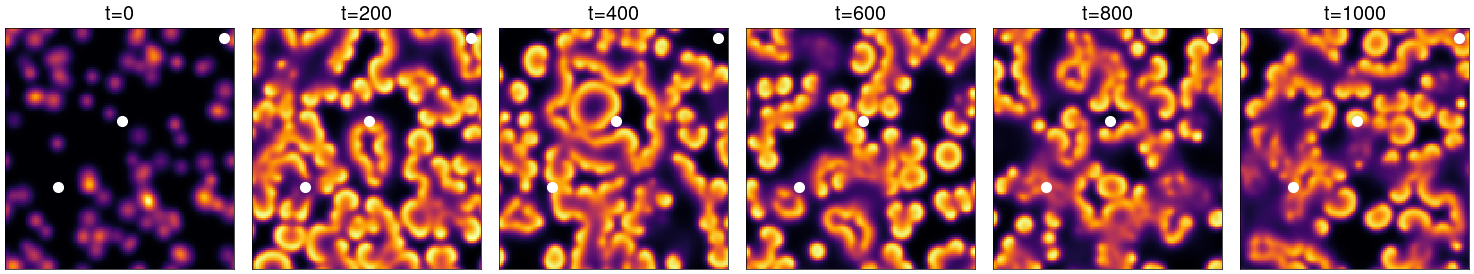

In [16]:
fig, axs = plt.subplots(1, 6, figsize=(15, 3))
for k, time in enumerate(tt):
    axs[k].pcolormesh(x2, y2, nx[time], cmap='inferno_r', vmin=0, vmax=1)
    axs[k].set_title(f't={time}')
    axs[k].set_xticks([])
    axs[k].set_yticks([])

    for m in range(3):
        axs[k].plot(i[m], j[m], 'wo', ms=7)

plt.tight_layout()
plt.show()

In [17]:
t = np.arange(1001)

In [18]:
series = []
for k in range(N):
    xk = nx[:, i[k], j[k]]
    series.append(xk)

series = np.array(series)

In [19]:
colours = ['blue', 'red', 'magenta', 'k', 'blueviolet']

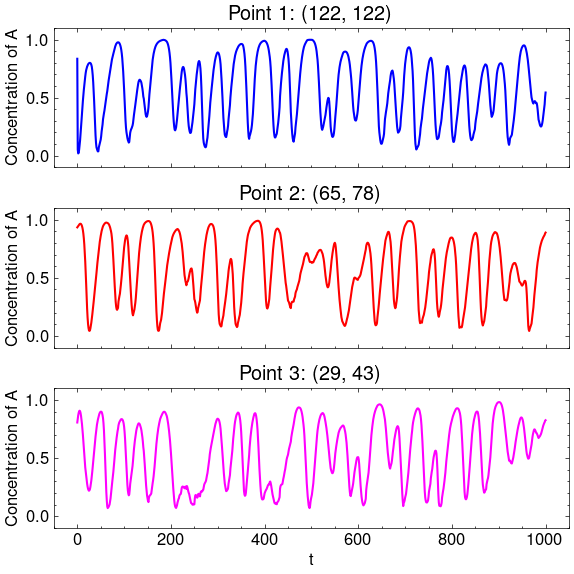

In [20]:
fig, axs = plt.subplots(3, 1, figsize=(6, 6), sharex=True)
for k, s in enumerate(series):
    axs[k].plot(t, s, colours[k], lw=1.5)
    axs[k].set_title(f'Point {k + 1}: ({i[k]}, {j[k]})')
    axs[k].set_ylabel('Concentration of A')
    axs[k].set_ylim(-0.1, 1.1)

plt.xlabel('t')

plt.tight_layout()
plt.show()

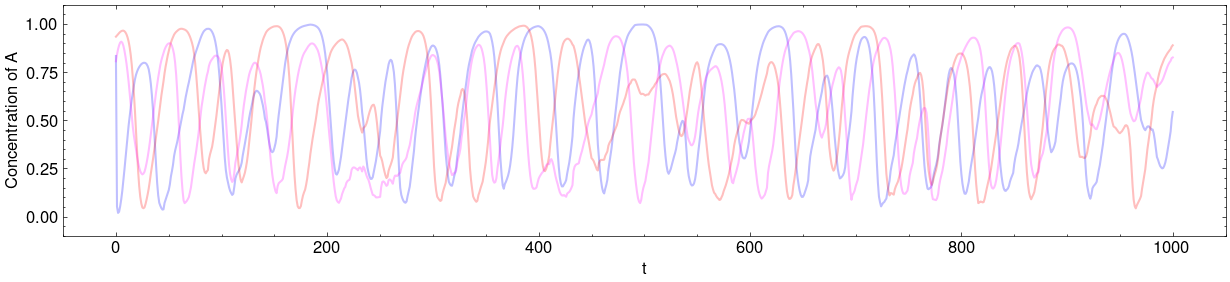

In [21]:
plt.figure(figsize=(15, 3))
for k in range(3):
    plt.plot(t, series[k], colours[k], lw=1.5, alpha=0.25)

plt.ylim(-0.1, 1.1)

plt.xlabel('t')
plt.ylabel('Concentration of A')
plt.show()

## **6. Autocorrelation Analysis**
- Compute and plot the autocorrelation function for each selected point.
- Interpret whether the signal is strongly correlated over time.

In [22]:
series_centered = np.array([series[k] - np.mean(series[k]) for k in range(len(series))])

In [23]:
acf = np.array([np.correlate(series_centered[k], series_centered[k], mode='full') for k in range(len(series))])

In [24]:
n_acf = []
for k in range(len(series)):
    n_acf.append(acf[k][acf[k].size // 2:] / np.max(acf[k]))

n_acf = np.array(n_acf)

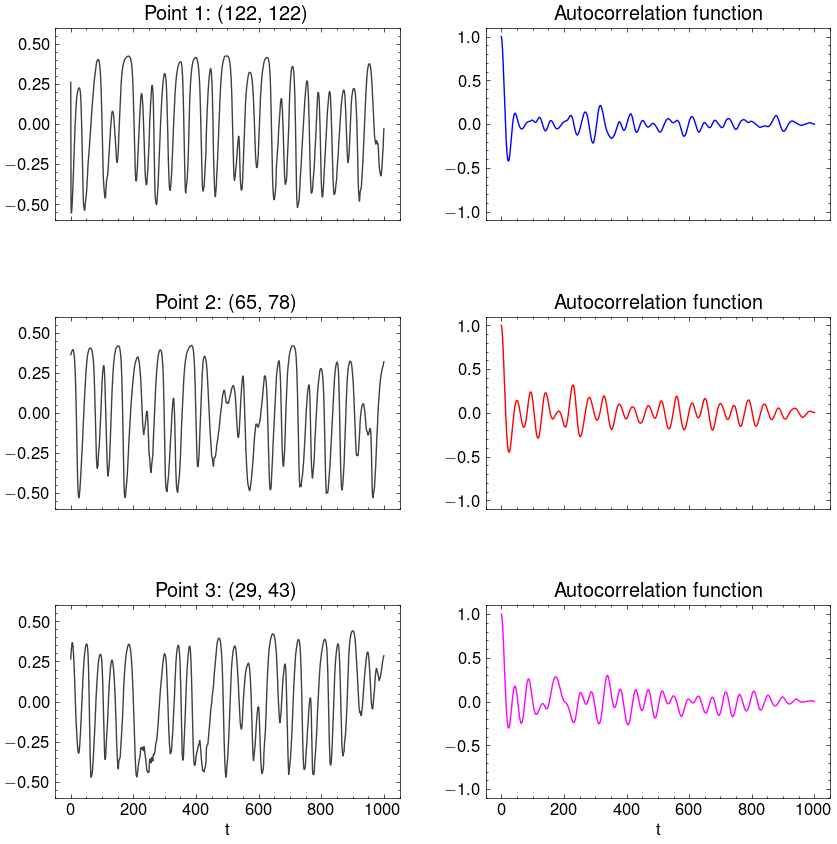

In [25]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10), sharex=True)
for k, s in enumerate(series_centered):
    axs[k, 0].plot(t, s, 'k', lw=1, alpha=0.75)
    axs[k, 0].set_title(f'Point {k + 1}: ({i[k]}, {j[k]})')
    axs[k, 0].set_ylim(-0.6, 0.6)

for k, s in enumerate(n_acf):
    axs[k, 1].plot(t, s, colours[k], lw=1)
    axs[k, 1].set_ylim(-1.1, 1.1)
    axs[k, 1].set_title('Autocorrelation function')

axs[N - 1, 0].set_xlabel('t')
axs[N - 1, 1].set_xlabel('t')

fig.subplots_adjust(wspace=0.25, hspace=0.5)
plt.show()

The original plots reveal the oscillatory nature of this simulation, which is shown with the wave-like pattern. The functions are not perfect sine waves, the different amplitudes suggest a complex system.

The autocorrelation functions support the oscillatory description of the system. We can notice that there are decays, the ACFs decrease in amplitude and die out.

$\to$ This implies we are working with a complex/chaotic system, the process has "memory", but it fades.

## **7. ARIMA Modeling**
- Fit an ARIMA model to each time series.
- Compare different `(p, d, q)` orders and choose the best using AIC.
- Plot the original series and fitted values.

In [26]:
import pandas as pd
from itertools import product
from statsmodels.tsa.arima.model import ARIMA

In [27]:
import warnings
warnings.filterwarnings("ignore")

In [28]:
ts = np.array([pd.Series(series_centered[k]) for k in range(len(series_centered))])

In [29]:
candidates = [(p, d, q) for p, d, q in product(range(0, 3), repeat=3)]
best = (None, np.inf, None)

In [30]:
for k in range(len(series)):
    for order in candidates:
        try:
            model = ARIMA(ts[k], order=order).fit()
            aic = model.aic
            if aic < best[1]:
                best = (order, aic, model)
        except Exception:
            pass

    print("Best ARIMA order:", best[0], "AIC:", best[1])

Best ARIMA order: (2, 0, 2) AIC: -4546.200656411697
Best ARIMA order: (2, 0, 2) AIC: -6694.9904098374445
Best ARIMA order: (2, 0, 2) AIC: -6694.9904098374445


The best ARIMA order is (2, 0, 2) (ARMA)

In [31]:
model1 = ARIMA(ts[0], order=(2, 0, 2))
result1 = model1.fit()
predictions1 = result1.fittedvalues
forecast1 = result1.forecast(steps=100)

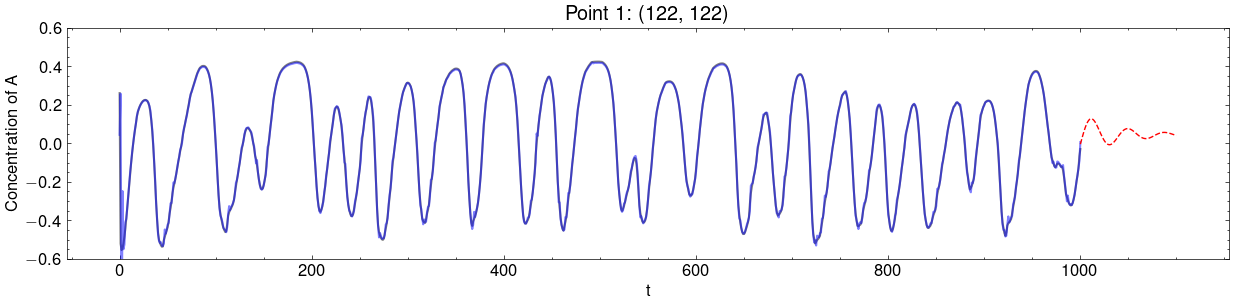

In [32]:
plt.figure(figsize=(15, 3))

plt.plot(t, series_centered[0], 'k', lw=1.5, alpha=0.5)
plt.plot(t, predictions1, 'b', lw=1.5, alpha=0.5)
plt.plot(np.linspace(1000, 1100, 100), forecast1, 'r--')
plt.title(f'Point {1}: ({i[0]}, {j[0]})')

plt.ylim(-0.6, 0.6)

plt.xlabel('t')
plt.ylabel('Concentration of A')
plt.show()

In [34]:
model2 = ARIMA(ts[1], order=(2, 0, 2))
result2 = model2.fit()
predictions2 = result2.fittedvalues
forecast2 = result2.forecast(steps=100)

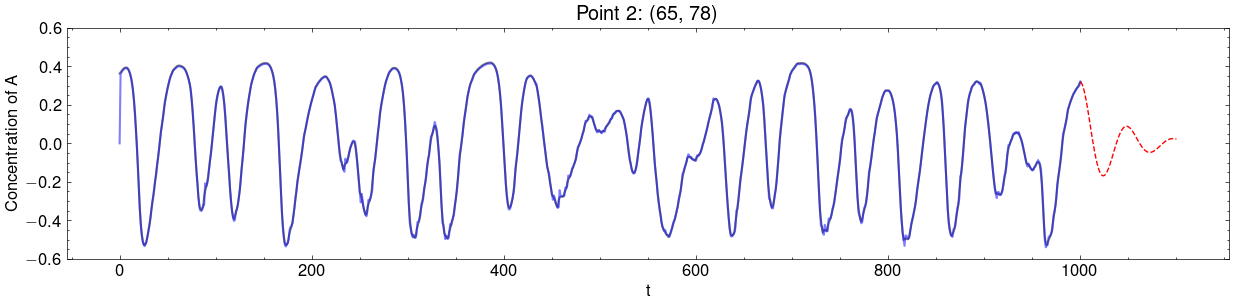

In [35]:
plt.figure(figsize=(15, 3))

plt.plot(t, series_centered[1], 'k', lw=1.5, alpha=0.5)
plt.plot(t, predictions2, 'b', lw=1.5, alpha=0.5)
plt.plot(np.linspace(1000, 1100, 100), forecast2, 'r--')
plt.title(f'Point {2}: ({i[1]}, {j[1]})')

plt.ylim(-0.6, 0.6)

plt.xlabel('t')
plt.ylabel('Concentration of A')
plt.show()

In [36]:
model3 = ARIMA(ts[2], order=(2, 0, 2))
result3 = model3.fit()
predictions3 = result3.fittedvalues
forecast3 = result3.forecast(steps=100)

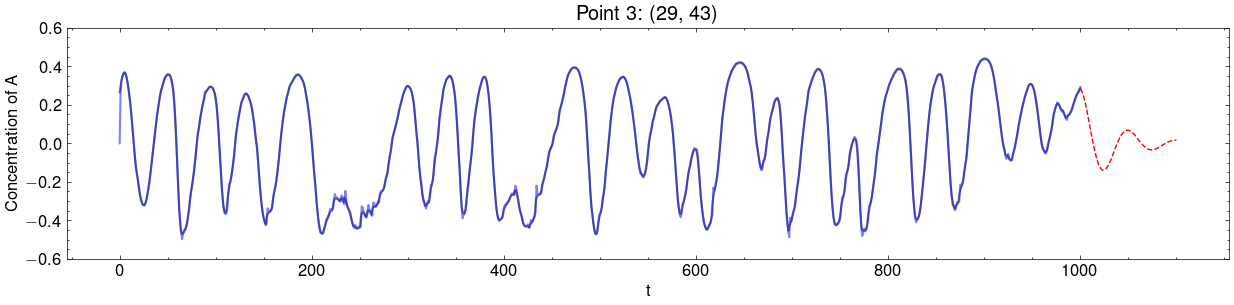

In [37]:
plt.figure(figsize=(15, 3))

plt.plot(t, series_centered[2], 'k', lw=1.5, alpha=0.5)
plt.plot(t, predictions3, 'b', lw=1.5, alpha=0.5)
plt.plot(np.linspace(1000, 1100, 100), forecast3, 'r--')
plt.title(f'Point {3}: ({i[2]}, {j[2]})')

plt.ylim(-0.6, 0.6)

plt.xlabel('t')
plt.ylabel('Concentration of A')
plt.show()

## **8. Fourier Transform**
- Apply the FFT to each time series.
- Plot the frequency spectrum.
- Identify dominant frequencies and discuss physical meaning.

In [38]:
from numpy.fft import fft, fftfreq

In [39]:
yfft = np.array([fft(series_centered[k]) for k in range(N)])
xfft = fftfreq(len(t), t[1] - t[0])

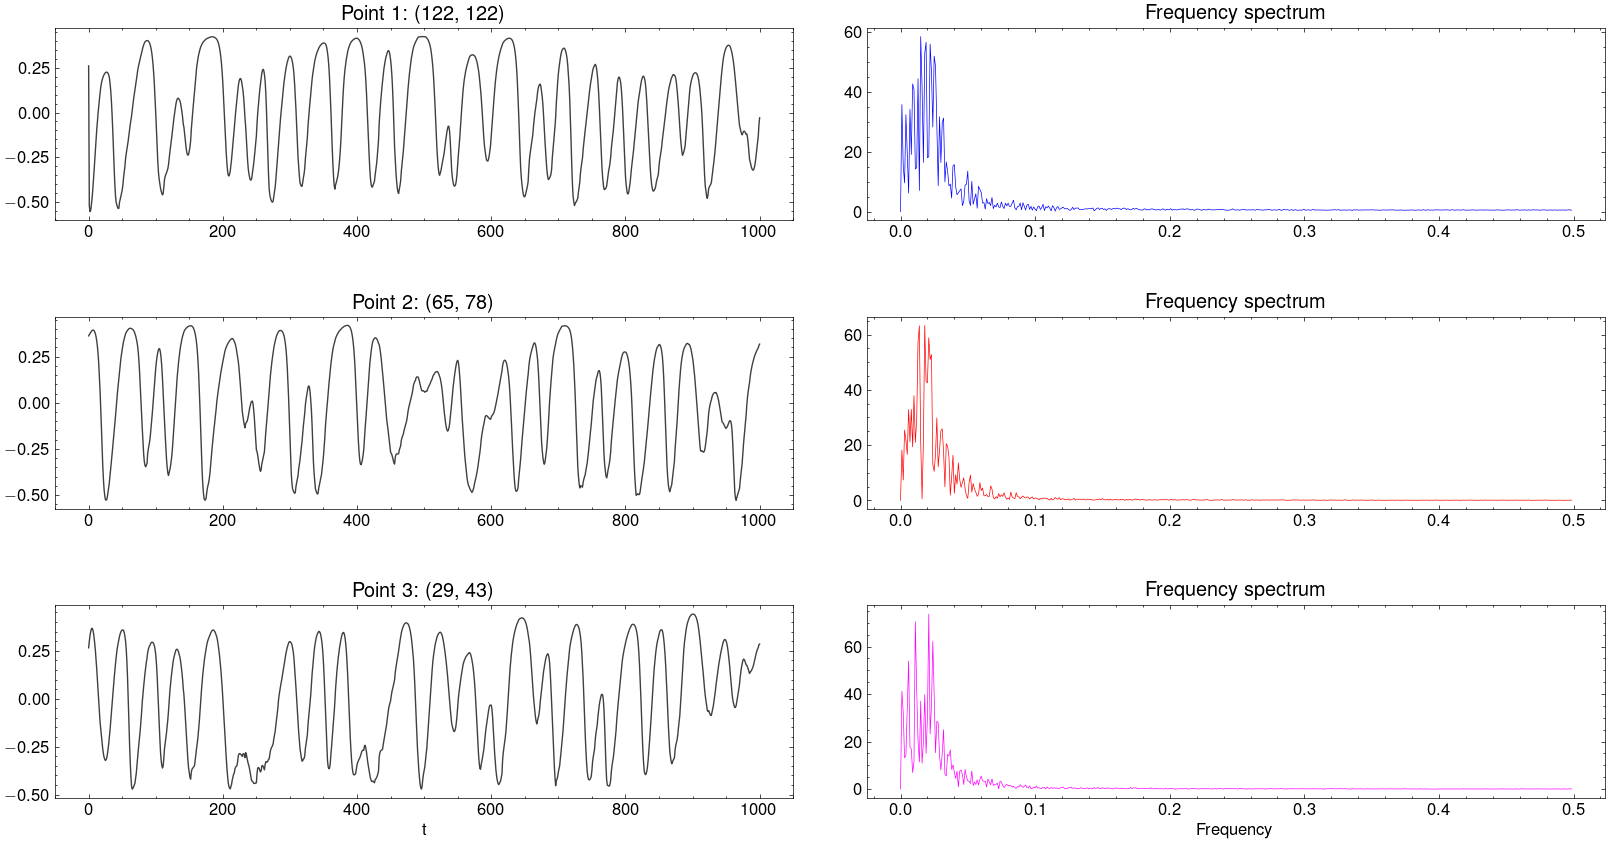

In [40]:
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for k, s in enumerate(series_centered):
    axs[k, 0].plot(t, s, 'k', lw=1, alpha=0.75)
    axs[k, 0].set_title(f'Point {k + 1}: ({i[k]}, {j[k]})')
    #axs[k, 0].set_ylim(-0.6, 0.6)

for k, s in enumerate(yfft):
    axs[k, 1].plot(xfft[:len(t) // 2], np.abs(s[:len(t) // 2]), colours[k], lw=0.5)
    #axs[k, 1].set_ylim(-1.1, 1.1)
    axs[k, 1].set_title('Frequency spectrum')

axs[N - 1, 0].set_xlabel('t')
axs[N - 1, 1].set_xlabel('Frequency')

fig.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

In [41]:
dominant_freqs = [xfft[np.argsort(np.abs(yfft[k]))[-3:]] for k in range(N)]

In [42]:
for k, f in enumerate(dominant_freqs):
    print(f'Point {k + 1} - dominant frequency: {f}')

Point 1 - dominant frequency: [ 0.01898102 -0.01498501  0.01498501]
Point 2 - dominant frequency: [-0.01398601  0.01798202 -0.01798202]
Point 3 - dominant frequency: [ 0.01098901 -0.02097902  0.02097902]


In [43]:
for k, f in enumerate(dominant_freqs):
    print(f'Point {k + 1} - dominant periods: {1 / f}')

Point 1 - dominant periods: [ 52.68421053 -66.73333333  66.73333333]
Point 2 - dominant periods: [-71.5         55.61111111 -55.61111111]
Point 3 - dominant periods: [ 91.         -47.66666667  47.66666667]


- The figures show several spikes, which is a signature of a complex/chaotic system.
- The different dominant frequencies show that cycles are different at different locations.
- As the frequencies are closer to 0, they are related to long-term oscillations. There are no short-term oscillations.

## **9. Wavelet Transform**
- Perform a Continuous Wavelet Transform (CWT) using a Morlet or Complex Morlet wavelet.
- Plot the scalogram.
- Highlight when and where bursts of activity occur.

In [44]:
import pywt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [45]:
scales = np.arange(1, 128)

cf = []
fq = []

for k in series_centered:
    c, f = pywt.cwt(k, scales, 'morl', sampling_period = t[1] - t[0])
    cf.append(c)
    fq.append(f)

cf = np.array(cf)
fq = np.array(fq)

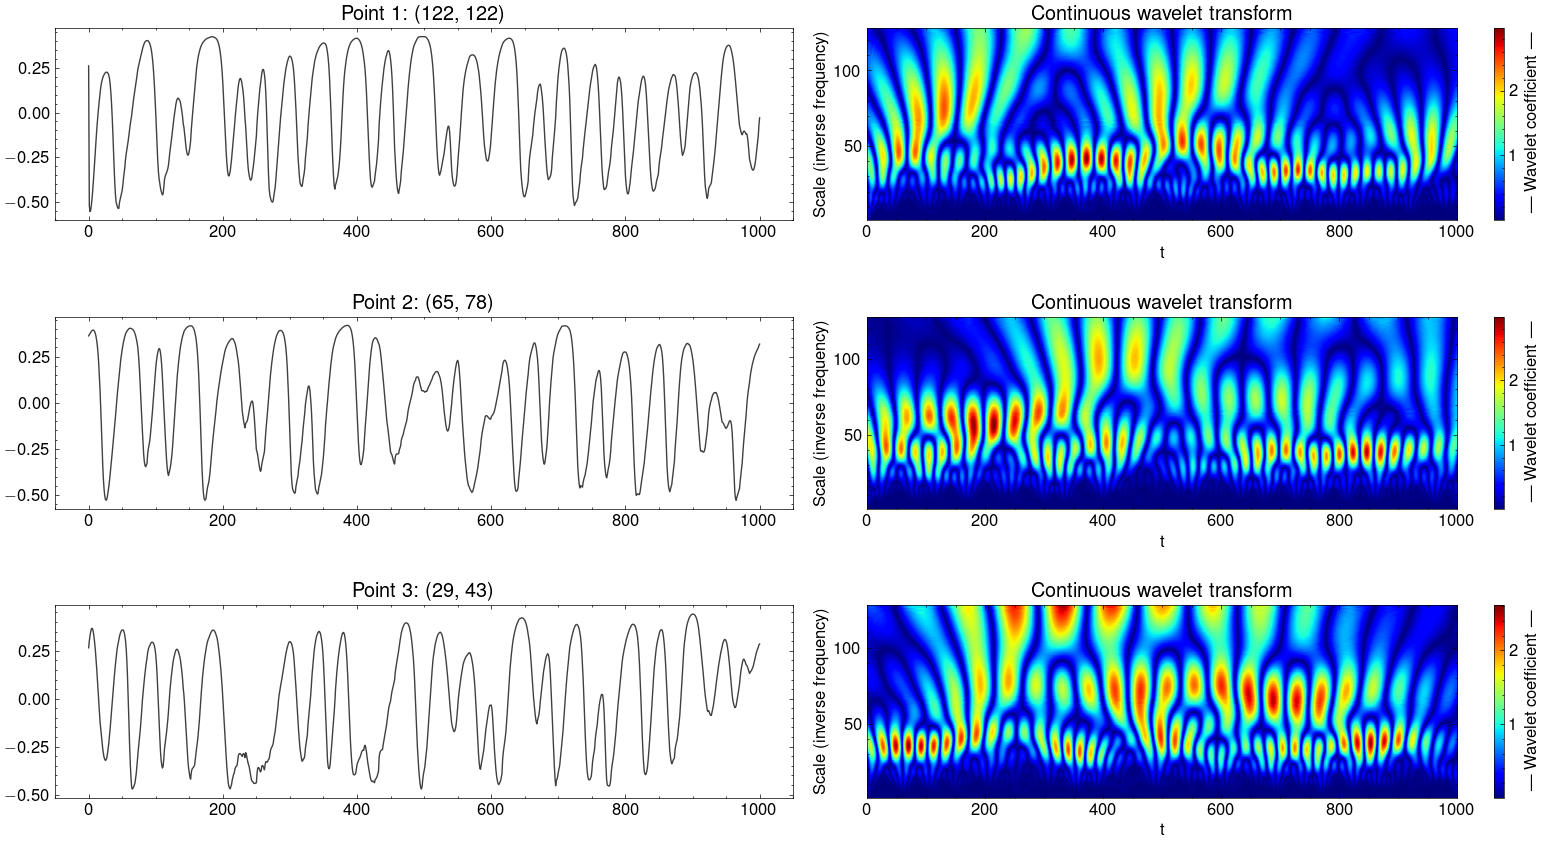

In [46]:
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for k, s in enumerate(series_centered):
    axs[k, 0].plot(t, s, 'k', lw=1, alpha=0.75)
    axs[k, 0].set_title(f'Point {k + 1}: ({i[k]}, {j[k]})')

for k, s in enumerate(cf):
    img = axs[k, 1].imshow(np.abs(s), extent=[t.min(), t.max(), 1, 128], cmap='jet', aspect='auto', origin='lower')
    axs[k, 1].set_xlabel('t')
    axs[k, 1].set_ylabel('Scale (inverse frequency)')
    axs[k, 1].set_title('Continuous wavelet transform')
    
    plt.colorbar(img, ax=axs[k, 1], label='| Wavelet coefficient |')

fig.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

We can notice several bursts of activity given by the yellow regions.

- **When they occur**. it is different for each point given different oscillations. For point 3 we can see burst between 200 and 300, which matches the low-amplitude phase in the time-series.
- **Where they occur**. The burst are almost consistently in a horizontal band which at a high scale which corresponds to dominant low frequency. It is a specific frequency band where the energy of the system is concentrated.

This shows that the time-series is non-stationary.

## **10. Discussion**
- Compare results from different points.
- Discuss differences between high and low concentration regions.
- Suggest physical interpretations of observed patterns.

- **Comparisons among plots.**

All the plots show chaotic oscillations with a dominant frequency around $f=0.03$. There should be a characteristic timescale for the system.

There is short "memory" which indicates rapidly decaying autocorrelation, which makes long-term prediction impossible. That is why the ARIMA model fails.

- **High and low concentration regions.**

High concentration regions are the moments a wavefront passes over a given point, which can be seen in the CWT as high-energy "bursts" concentrated at the dominant low frequency. It is the active propagating part of the pattern.

Low concentration regions are the background state. The CWT shows that the low-frequency bursts vanish and are replaced by weak, high frequecy (low scale) fluctuations. This shows after a pattern has died out before one new starts.

- **Physical interpretations.**

There is an underlying dominant frequency with a period $T\approx 33$ time units for a spot to replicate. It is the fundamental timescale of pattern formation.

There are non-linear interaction from which arise the chaotic nature. A single wave might propagate predictably, the collisions, merges and annihilations produce complexity.

The system always changes, there could be stable oscillations in a specific region, but any change produce abrupt differences in the local dynamics, leading to different patterns in the points taken for the time series.